# How dominant are Liverpool and Manchester City exactly?
<img width=1000px src='https://www.thisisanfield.com/wp-content/uploads/PA-29587739.jpg'>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette("pastel")
pd.options.mode.chained_assignment = None
city_color = '#40c4ff'
liv_color = '#d93954'
avg_color = '#4d4d4d'

### I will import dataset downloaded from Kaggle to analyze the data for these 2 clubs from the start of 2016/2017 season (first full seasons with Klopp and Guardiola in charge of the respective clubs)

In [2]:
results = pd.read_csv('../../pl_results_data/results.csv', encoding = "ISO-8859-1", parse_dates=['DateTime'])
results

Season                  DateTime     HomeTeam        AwayTeam  FTHG  \
0      1993-94 1993-08-14 00:00:00+00:00      Arsenal        Coventry     0   
1      1993-94 1993-08-14 00:00:00+00:00  Aston Villa             QPR     4   
2      1993-94 1993-08-14 00:00:00+00:00      Chelsea       Blackburn     1   
3      1993-94 1993-08-14 00:00:00+00:00    Liverpool  Sheffield Weds     2   
4      1993-94 1993-08-14 00:00:00+00:00     Man City           Leeds     1   
...        ...                       ...          ...             ...   ...   
11108  2021-22 2022-04-09 17:30:00+00:00  Aston Villa       Tottenham     0   
11109  2021-22 2022-04-10 14:00:00+00:00    Brentford        West Ham     2   
11110  2021-22 2022-04-10 14:00:00+00:00    Leicester  Crystal Palace     2   
11111  2021-22 2022-04-10 14:00:00+00:00      Norwich         Burnley     2   
11112  2021-22 2022-04-10 16:30:00+00:00     Man City       Liverpool     2   

       FTAG FTR  HTHG  HTAG  HTR  ...  HST  AST   HC   AC    HF    AF   HY  \
0         3   A   NaN   NaN  NaN  ...  NaN  NaN  NaN  NaN   NaN   NaN  NaN   
1         1   H   NaN   NaN  NaN  ...  NaN  NaN  NaN  NaN   NaN   NaN  NaN   
2         2   A   NaN   NaN  NaN  ...  NaN  NaN  NaN  NaN   NaN   NaN  NaN   
3         0   H   NaN   NaN  NaN  ...  NaN  NaN  NaN  NaN   NaN   NaN  NaN   
4         1   D   NaN   NaN  NaN  ...  NaN  NaN  NaN  NaN   NaN   NaN  NaN   
...     ...  ..   ...   ...  ...  ...  ...  ...  ...  ...   ...   ...  ...   
11108     4   A   0.0   1.0    A  ...  8.0  5.0  9.0  3.0  12.0  14.0  2.0   
11109     0   H   0.0   0.0    D  ...  7.0  1.0  4.0  6.0   2.0   6.0  0.0   
11110     1   H   2.0   0.0    H  ...  3.0  3.0  3.0  4.0  11.0  12.0  1.0   
11111     0   H   1.0   0.0    H  ...  6.0  4.0  6.0  7.0  12.0  10.0  1.0   
11112     2   D   2.0   1.0    H  ...  5.0  4.0  4.0  1.0   9.0  11.0  1.0   

        AY   HR   AR  
0      NaN  NaN  NaN  
1      NaN  NaN  NaN  
2      NaN  NaN  NaN  
3      NaN  NaN  NaN  
4      NaN  NaN  NaN  
...    ...  ...  ...  
11108  3.0  0.0  0.0  
11109  1.0  0.0  0.0  
11110  1.0  0.0  0.0  
11111  1.0  0.0  0.0  
11112  4.0  0.0  0.0  

[11113 rows x 23 columns]

In [3]:
results.columns

Index(['Season', 'DateTime', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC',
       'HF', 'AF', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')

In [4]:
# For the full_time_result and half_time_result columns we have 3 values (H - home win, D - draw, A - away win)

mapper = {
    'Season': 'season',
    'DateTime': 'date_time',
    'HomeTeam': 'home_team',
    'AwayTeam': 'away_team',
    'FTHG': 'full_time_home_team_goals',
    'FTAG': 'full_time_away_team_goals',
    'FTR': 'full_time_result',
    'HTHG': 'half_time_home_team_goals',
    'HTAG': 'half_time_away_team_goals',
    'HTR': 'half_time_result',
    'HS': 'home_team_shots',
    'AS': 'away_team_shots',
    'HST': 'home_team_shots_on_target',
    'AST': 'away_team_shots_on_target',
    'HC': 'home_team_corners',
    'AC': 'away_team_corners',
    'HF': 'home_team_fouls_committed',
    'AF': 'away_team_fouls_committed',
    'HY': 'home_team_yellow_cards',
    'AY': 'away_team_yellow_cards',
    'HR': 'home_team_red_cards',
    'AR': 'away_team_red_cards'
}

results.rename(columns=mapper, inplace=True)
results

season                 date_time    home_team       away_team  \
0      1993-94 1993-08-14 00:00:00+00:00      Arsenal        Coventry   
1      1993-94 1993-08-14 00:00:00+00:00  Aston Villa             QPR   
2      1993-94 1993-08-14 00:00:00+00:00      Chelsea       Blackburn   
3      1993-94 1993-08-14 00:00:00+00:00    Liverpool  Sheffield Weds   
4      1993-94 1993-08-14 00:00:00+00:00     Man City           Leeds   
...        ...                       ...          ...             ...   
11108  2021-22 2022-04-09 17:30:00+00:00  Aston Villa       Tottenham   
11109  2021-22 2022-04-10 14:00:00+00:00    Brentford        West Ham   
11110  2021-22 2022-04-10 14:00:00+00:00    Leicester  Crystal Palace   
11111  2021-22 2022-04-10 14:00:00+00:00      Norwich         Burnley   
11112  2021-22 2022-04-10 16:30:00+00:00     Man City       Liverpool   

       full_time_home_team_goals  full_time_away_team_goals full_time_result  \
0                              0                          3                A   
1                              4                          1                H   
2                              1                          2                A   
3                              2                          0                H   
4                              1                          1                D   
...                          ...                        ...              ...   
11108                          0                          4                A   
11109                          2                          0                H   
11110                          2                          1                H   
11111                          2                          0                H   
11112                          2                          2                D   

       half_time_home_team_goals  half_time_away_team_goals half_time_result  \
0                            NaN                        NaN              NaN   
1                            NaN                        NaN              NaN   
2                            NaN                        NaN              NaN   
3                            NaN                        NaN              NaN   
4                            NaN                        NaN              NaN   
...                          ...                        ...              ...   
11108                        0.0                        1.0                A   
11109                        0.0                        0.0                D   
11110                        2.0                        0.0                H   
11111                        1.0                        0.0                H   
11112                        2.0                        1.0                H   

       ... home_team_shots_on_target  away_team_shots_on_target  \
0      ...                       NaN                        NaN   
1      ...                       NaN                        NaN   
2      ...                       NaN                        NaN   
3      ...                       NaN                        NaN   
4      ...                       NaN                        NaN   
...    ...                       ...                        ...   
11108  ...                       8.0                        5.0   
11109  ...                       7.0                        1.0   
11110  ...                       3.0                        3.0   
11111  ...                       6.0                        4.0   
11112  ...                       5.0                        4.0   

       home_team_corners  away_team_corners  home_team_fouls_committed  \
0                    NaN                NaN                        NaN   
1                    NaN                NaN                        NaN   
2                    NaN                NaN                        NaN   
3                    NaN                NaN                        NaN   
4                    NaN          

In [5]:
df = results[results['date_time'] > '2016-08-01']

In [6]:
df

season                 date_time       home_team       away_team  \
8904   2016-17 2016-08-13 00:00:00+00:00         Burnley         Swansea   
8905   2016-17 2016-08-13 00:00:00+00:00  Crystal Palace       West Brom   
8906   2016-17 2016-08-13 00:00:00+00:00         Everton       Tottenham   
8907   2016-17 2016-08-13 00:00:00+00:00            Hull       Leicester   
8908   2016-17 2016-08-13 00:00:00+00:00        Man City      Sunderland   
...        ...                       ...             ...             ...   
11108  2021-22 2022-04-09 17:30:00+00:00     Aston Villa       Tottenham   
11109  2021-22 2022-04-10 14:00:00+00:00       Brentford        West Ham   
11110  2021-22 2022-04-10 14:00:00+00:00       Leicester  Crystal Palace   
11111  2021-22 2022-04-10 14:00:00+00:00         Norwich         Burnley   
11112  2021-22 2022-04-10 16:30:00+00:00        Man City       Liverpool   

       full_time_home_team_goals  full_time_away_team_goals full_time_result  \
8904                           0                          1                A   
8905                           0                          1                A   
8906                           1                          1                D   
8907                           2                          1                H   
8908                           2                          1                H   
...                          ...                        ...              ...   
11108                          0                          4                A   
11109                          2                          0                H   
11110                          2                          1                H   
11111                          2                          0                H   
11112                          2                          2                D   

       half_time_home_team_goals  half_time_away_team_goals half_time_result  \
8904                         0.0                        0.0                D   
8905                         0.0                        0.0                D   
8906                         1.0                        0.0                H   
8907                         1.0                        0.0                H   
8908                         1.0                        0.0                H   
...                          ...                        ...              ...   
11108                        0.0                        1.0                A   
11109                        0.0                        0.0                D   
11110                        2.0                        0.0                H   
11111                        1.0                        0.0                H   
11112                        2.0                        1.0                H   

       ... home_team_shots_on_target  away_team_shots_on_target  \
8904   ...                       3.0                        9.0   
8905   ...                       4.0                        3.0   
8906   ...                       6.0                        4.0   
8907   ...                       5.0                        5.0   
8908   ...                       4.0                        3.0   
...    ...                       ...                        ...   
11108  ...                       8.0                        5.0   
11109  ...                       7.0                        1.0   
11110  ...                       3.0                        3.0   
11111  ...                       6.0                        4.0   
11112  ...                       5.0                        4.0   

       home_team_corners  away_team_corners  home_team_fouls_committed  \
8904                 7.0                4.0                       10.0   
8905                 3.0                6.0                       12.0   
8906                 5.0                6.0                       10.0   
8907                 5.0                3.0                        8.0  

In [7]:
df.dtypes

season                                    object
date_time                    datetime64[ns, UTC]
home_team                                 object
away_team                                 object
full_time_home_team_goals                  int64
full_time_away_team_goals                  int64
full_time_result                          object
half_time_home_team_goals                float64
half_time_away_team_goals                float64
half_time_result                          object
Referee                                   object
home_team_shots                          float64
away_team_shots                          float64
home_team_shots_on_target                float64
away_team_shots_on_target                float64
home_team_corners                        float64
away_team_corners                        float64
home_team_fouls_committed                float64
away_team_fouls_committed                float64
home_team_yellow_cards                   float64
away_team_yellow_car

In [8]:
df['half_time_home_team_goals'] = df['half_time_home_team_goals'].astype('int64')
df['half_time_away_team_goals'] = df['half_time_away_team_goals'].astype('int64')

df['home_team_shots'] = df['home_team_shots'].astype('int64')
df['away_team_shots'] = df['away_team_shots'].astype('int64')

df['home_team_shots_on_target'] = df['home_team_shots_on_target'].astype('int64')
df['away_team_shots_on_target'] = df['away_team_shots_on_target'].astype('int64')

df['home_team_corners'] = df['home_team_corners'].astype('int64')
df['away_team_corners'] = df['away_team_corners'].astype('int64')

df['home_team_fouls_committed'] = df['home_team_fouls_committed'].astype('int64')
df['away_team_fouls_committed'] = df['away_team_fouls_committed'].astype('int64')

df['home_team_yellow_cards'] = df['home_team_yellow_cards'].astype('int64')
df['away_team_yellow_cards'] = df['away_team_yellow_cards'].astype('int64')

df['home_team_red_cards'] = df['home_team_red_cards'].astype('int64')
df['away_team_red_cards'] = df['away_team_red_cards'].astype('int64')

#### Let's write a function to make a new column with the name of the team that won, or no_winner if it was a draw.

In [9]:
def match_winner(x):
    if x['full_time_result'] == 'A':
        return x['away_team']
    elif x['full_time_result'] == 'H':
        return x['home_team']
    else:
        return 'no_winner'

In [10]:
match_outcome = df.apply(match_winner, axis=1)
df['winner'] = match_outcome
df

season                 date_time       home_team       away_team  \
8904   2016-17 2016-08-13 00:00:00+00:00         Burnley         Swansea   
8905   2016-17 2016-08-13 00:00:00+00:00  Crystal Palace       West Brom   
8906   2016-17 2016-08-13 00:00:00+00:00         Everton       Tottenham   
8907   2016-17 2016-08-13 00:00:00+00:00            Hull       Leicester   
8908   2016-17 2016-08-13 00:00:00+00:00        Man City      Sunderland   
...        ...                       ...             ...             ...   
11108  2021-22 2022-04-09 17:30:00+00:00     Aston Villa       Tottenham   
11109  2021-22 2022-04-10 14:00:00+00:00       Brentford        West Ham   
11110  2021-22 2022-04-10 14:00:00+00:00       Leicester  Crystal Palace   
11111  2021-22 2022-04-10 14:00:00+00:00         Norwich         Burnley   
11112  2021-22 2022-04-10 16:30:00+00:00        Man City       Liverpool   

       full_time_home_team_goals  full_time_away_team_goals full_time_result  \
8904                           0                          1                A   
8905                           0                          1                A   
8906                           1                          1                D   
8907                           2                          1                H   
8908                           2                          1                H   
...                          ...                        ...              ...   
11108                          0                          4                A   
11109                          2                          0                H   
11110                          2                          1                H   
11111                          2                          0                H   
11112                          2                          2                D   

       half_time_home_team_goals  half_time_away_team_goals half_time_result  \
8904                           0                          0                D   
8905                           0                          0                D   
8906                           1                          0                H   
8907                           1                          0                H   
8908                           1                          0                H   
...                          ...                        ...              ...   
11108                          0                          1                A   
11109                          0                          0                D   
11110                          2                          0                H   
11111                          1                          0                H   
11112                          2                          1                H   

       ... away_team_shots_on_target  home_team_corners  away_team_corners  \
8904   ...                         9                  7                  4   
8905   ...                         3                  3                  6   
8906   ...                         4                  5                  6   
8907   ...                         5                  5                  3   
8908   ...                         3                  9                  6   
...    ...                       ...                ...                ...   
11108  ...                         5                  9                  3   
11109  ...                         1                  4                  6   
11110  ...                         3                  3                  4   
11111  ...                         4                  6                  7   
11112  ...                         4                  4                  1   

       home_team_fouls_committed  away_team_fouls_committed  \
8904                          10                         14   
8905                          12                         15   
8906                          10               

In [11]:
# MASKS:
liv_home = df['home_team'] == 'Liverpool'
liv_away = df['away_team'] == 'Liverpool'
city_home = df['home_team'] == 'Man City'
city_away = df['away_team'] == 'Man City'

In [12]:
liv = df[liv_home | liv_away]
city = df[city_home | city_away]

In [13]:
def goals_scored_full_time_liv(x):
    if x['home_team'] == 'Liverpool':
        return x['full_time_home_team_goals']
    elif x['away_team'] == 'Liverpool':
        return x['full_time_away_team_goals']
    
def goals_scored_half_time_liv(x):
    if x['home_team'] == 'Liverpool':
        return x['half_time_home_team_goals']
    elif x['away_team'] == 'Liverpool':
        return x['half_time_away_team_goals']
    
def goals_scored_full_time_city(x):
    if x['home_team'] == 'Man City':
        return x['full_time_home_team_goals']
    elif x['away_team'] == 'Man City':
        return x['full_time_away_team_goals']
    
def goals_scored_half_time_city(x):
    if x['home_team'] == 'Man City':
        return x['half_time_home_team_goals']
    elif x['away_team'] == 'Man City':
        return x['half_time_away_team_goals']

In [14]:
df

season                 date_time       home_team       away_team  \
8904   2016-17 2016-08-13 00:00:00+00:00         Burnley         Swansea   
8905   2016-17 2016-08-13 00:00:00+00:00  Crystal Palace       West Brom   
8906   2016-17 2016-08-13 00:00:00+00:00         Everton       Tottenham   
8907   2016-17 2016-08-13 00:00:00+00:00            Hull       Leicester   
8908   2016-17 2016-08-13 00:00:00+00:00        Man City      Sunderland   
...        ...                       ...             ...             ...   
11108  2021-22 2022-04-09 17:30:00+00:00     Aston Villa       Tottenham   
11109  2021-22 2022-04-10 14:00:00+00:00       Brentford        West Ham   
11110  2021-22 2022-04-10 14:00:00+00:00       Leicester  Crystal Palace   
11111  2021-22 2022-04-10 14:00:00+00:00         Norwich         Burnley   
11112  2021-22 2022-04-10 16:30:00+00:00        Man City       Liverpool   

       full_time_home_team_goals  full_time_away_team_goals full_time_result  \
8904                           0                          1                A   
8905                           0                          1                A   
8906                           1                          1                D   
8907                           2                          1                H   
8908                           2                          1                H   
...                          ...                        ...              ...   
11108                          0                          4                A   
11109                          2                          0                H   
11110                          2                          1                H   
11111                          2                          0                H   
11112                          2                          2                D   

       half_time_home_team_goals  half_time_away_team_goals half_time_result  \
8904                           0                          0                D   
8905                           0                          0                D   
8906                           1                          0                H   
8907                           1                          0                H   
8908                           1                          0                H   
...                          ...                        ...              ...   
11108                          0                          1                A   
11109                          0                          0                D   
11110                          2                          0                H   
11111                          1                          0                H   
11112                          2                          1                H   

       ... away_team_shots_on_target  home_team_corners  away_team_corners  \
8904   ...                         9                  7                  4   
8905   ...                         3                  3                  6   
8906   ...                         4                  5                  6   
8907   ...                         5                  5                  3   
8908   ...                         3                  9                  6   
...    ...                       ...                ...                ...   
11108  ...                         5                  9                  3   
11109  ...                         1                  4                  6   
11110  ...                         3                  3                  4   
11111  ...                         4                  6                  7   
11112  ...                         4                  4                  1   

       home_team_fouls_committed  away_team_fouls_committed  \
8904                          10                         14   
8905                          12                         15   
8906                          10               

In [15]:
liv_goals_scored_full = liv.apply(goals_scored_full_time_liv, axis=1)
liv['liv_full_time_goals_scored'] = liv_goals_scored_full

liv_goals_scored_half = liv.apply(goals_scored_half_time_liv, axis=1)
liv['liv_half_time_goals_scored'] = liv_goals_scored_half

city_goals_scored_full = city.apply(goals_scored_full_time_city, axis=1)
city['city_full_time_goals_scored'] = city_goals_scored_full

city_goals_scored_half = city.apply(goals_scored_half_time_city, axis=1)
city['city_half_time_goals_scored'] = city_goals_scored_half

In [16]:
def goals_conc_full_time_liv(x):
    if x['home_team'] == 'Liverpool':
        return x['full_time_away_team_goals']
    elif x['away_team'] == 'Liverpool':
        return x['full_time_home_team_goals']

def goals_conc_half_time_liv(x):
    if x['home_team'] == 'Liverpool':
        return x['half_time_away_team_goals']
    elif x['away_team'] == 'Liverpool':
        return x['half_time_home_team_goals']
    
def goals_conc_full_time_city(x):
    if x['home_team'] == 'Man City':
        return x['full_time_away_team_goals']
    elif x['away_team'] == 'Man City':
        return x['full_time_home_team_goals']

def goals_conc_half_time_city(x):
    if x['home_team'] == 'Man City':
        return x['half_time_away_team_goals']
    elif x['away_team'] == 'Man City':
        return x['half_time_home_team_goals']

In [17]:
liv_goals_conc_full = liv.apply(goals_conc_full_time_liv, axis=1)
liv['liv_full_time_goals_conc'] = liv_goals_conc_full

liv_goals_conc_half = liv.apply(goals_conc_half_time_liv, axis=1)
liv['liv_half_time_goals_conc'] = liv_goals_conc_half

city_goals_conc_full = city.apply(goals_conc_full_time_city, axis=1)
city['city_full_time_goals_conc'] = city_goals_conc_full

city_goals_conc_half = city.apply(goals_conc_half_time_city, axis=1)
city['city_half_time_goals_conc'] = city_goals_conc_half

In [18]:
city

season                 date_time       home_team    away_team  \
8908   2016-17 2016-08-13 00:00:00+00:00        Man City   Sunderland   
8917   2016-17 2016-08-20 00:00:00+00:00           Stoke     Man City   
8932   2016-17 2016-08-28 00:00:00+00:00        Man City     West Ham   
8938   2016-17 2016-09-10 00:00:00+00:00      Man United     Man City   
8948   2016-17 2016-09-17 00:00:00+00:00        Man City  Bournemouth   
...        ...                       ...             ...          ...   
11058  2021-22 2022-02-26 17:30:00+00:00         Everton     Man City   
11069  2021-22 2022-03-06 16:30:00+00:00        Man City   Man United   
11084  2021-22 2022-03-14 20:00:00+00:00  Crystal Palace     Man City   
11094  2021-22 2022-04-02 15:00:00+00:00         Burnley     Man City   
11112  2021-22 2022-04-10 16:30:00+00:00        Man City    Liverpool   

       full_time_home_team_goals  full_time_away_team_goals full_time_result  \
8908                           2                          1                H   
8917                           1                          4                A   
8932                           3                          1                H   
8938                           1                          2                A   
8948                           4                          0                H   
...                          ...                        ...              ...   
11058                          0                          1                A   
11069                          4                          1                H   
11084                          0                          0                D   
11094                          0                          2                A   
11112                          2                          2                D   

       half_time_home_team_goals  half_time_away_team_goals half_time_result  \
8908                           1                          0                H   
8917                           0                          2                A   
8932                           2                          0                H   
8938                           1                          2                A   
8948                           2                          0                H   
...                          ...                        ...              ...   
11058                          0                          0                D   
11069                          2                          1                H   
11084                          0                          0                D   
11094                          0                          2                A   
11112                          2                          1                H   

       ... away_team_fouls_committed  home_team_yellow_cards  \
8908   ...                        14                       1   
8917   ...                        13                       3   
8932   ...                        10                       1   
8938   ...                        10                       4   
8948   ...                        11                       1   
...    ...                       ...                     ...   
11058  ...                        14                       3   
11069  ...                        14                       0   
11084  ...                        11                       3   
11094  ...                         6                       1   
11112  ...                        11                       1   

       away_team_yellow_cards  home_team_red_cards  away_team_red_cards  \
8908                        2                    0                    0   
8917                        4                    0                    0   
8932                        3                    0                    0   
8938                        2                    0                    0   
8948                        1                    1               

In [19]:
df

season                 date_time       home_team       away_team  \
8904   2016-17 2016-08-13 00:00:00+00:00         Burnley         Swansea   
8905   2016-17 2016-08-13 00:00:00+00:00  Crystal Palace       West Brom   
8906   2016-17 2016-08-13 00:00:00+00:00         Everton       Tottenham   
8907   2016-17 2016-08-13 00:00:00+00:00            Hull       Leicester   
8908   2016-17 2016-08-13 00:00:00+00:00        Man City      Sunderland   
...        ...                       ...             ...             ...   
11108  2021-22 2022-04-09 17:30:00+00:00     Aston Villa       Tottenham   
11109  2021-22 2022-04-10 14:00:00+00:00       Brentford        West Ham   
11110  2021-22 2022-04-10 14:00:00+00:00       Leicester  Crystal Palace   
11111  2021-22 2022-04-10 14:00:00+00:00         Norwich         Burnley   
11112  2021-22 2022-04-10 16:30:00+00:00        Man City       Liverpool   

       full_time_home_team_goals  full_time_away_team_goals full_time_result  \
8904                           0                          1                A   
8905                           0                          1                A   
8906                           1                          1                D   
8907                           2                          1                H   
8908                           2                          1                H   
...                          ...                        ...              ...   
11108                          0                          4                A   
11109                          2                          0                H   
11110                          2                          1                H   
11111                          2                          0                H   
11112                          2                          2                D   

       half_time_home_team_goals  half_time_away_team_goals half_time_result  \
8904                           0                          0                D   
8905                           0                          0                D   
8906                           1                          0                H   
8907                           1                          0                H   
8908                           1                          0                H   
...                          ...                        ...              ...   
11108                          0                          1                A   
11109                          0                          0                D   
11110                          2                          0                H   
11111                          1                          0                H   
11112                          2                          1                H   

       ... away_team_shots_on_target  home_team_corners  away_team_corners  \
8904   ...                         9                  7                  4   
8905   ...                         3                  3                  6   
8906   ...                         4                  5                  6   
8907   ...                         5                  5                  3   
8908   ...                         3                  9                  6   
...    ...                       ...                ...                ...   
11108  ...                         5                  9                  3   
11109  ...                         1                  4                  6   
11110  ...                         3                  3                  4   
11111  ...                         4                  6                  7   
11112  ...                         4                  4                  1   

       home_team_fouls_committed  away_team_fouls_committed  \
8904                          10                         14   
8905                          12                         15   
8906                          10               

##### We need one more function to determine the outcome of Win Draw Loss for our teams.

In [20]:
def win_loss_liv(x):
    if(x['winner'] == "Liverpool"):
        return "W"
    elif(x['winner'] == "no_winner"):
        return "D"
    else:
        return 'L'

def win_loss_city(x):
    if(x['winner'] == "Man City"):
        return "W"
    elif(x['winner'] == "no_winner"):
        return "D"
    else:
        return 'L'

In [21]:
liv_out = liv.apply(win_loss_liv, axis=1)
liv['outcome'] = liv_out
city_out = city.apply(win_loss_city, axis=1)
city['outcome'] = city_out

In [22]:
city

season                 date_time       home_team    away_team  \
8908   2016-17 2016-08-13 00:00:00+00:00        Man City   Sunderland   
8917   2016-17 2016-08-20 00:00:00+00:00           Stoke     Man City   
8932   2016-17 2016-08-28 00:00:00+00:00        Man City     West Ham   
8938   2016-17 2016-09-10 00:00:00+00:00      Man United     Man City   
8948   2016-17 2016-09-17 00:00:00+00:00        Man City  Bournemouth   
...        ...                       ...             ...          ...   
11058  2021-22 2022-02-26 17:30:00+00:00         Everton     Man City   
11069  2021-22 2022-03-06 16:30:00+00:00        Man City   Man United   
11084  2021-22 2022-03-14 20:00:00+00:00  Crystal Palace     Man City   
11094  2021-22 2022-04-02 15:00:00+00:00         Burnley     Man City   
11112  2021-22 2022-04-10 16:30:00+00:00        Man City    Liverpool   

       full_time_home_team_goals  full_time_away_team_goals full_time_result  \
8908                           2                          1                H   
8917                           1                          4                A   
8932                           3                          1                H   
8938                           1                          2                A   
8948                           4                          0                H   
...                          ...                        ...              ...   
11058                          0                          1                A   
11069                          4                          1                H   
11084                          0                          0                D   
11094                          0                          2                A   
11112                          2                          2                D   

       half_time_home_team_goals  half_time_away_team_goals half_time_result  \
8908                           1                          0                H   
8917                           0                          2                A   
8932                           2                          0                H   
8938                           1                          2                A   
8948                           2                          0                H   
...                          ...                        ...              ...   
11058                          0                          0                D   
11069                          2                          1                H   
11084                          0                          0                D   
11094                          0                          2                A   
11112                          2                          1                H   

       ... home_team_yellow_cards  away_team_yellow_cards  \
8908   ...                      1                       2   
8917   ...                      3                       4   
8932   ...                      1                       3   
8938   ...                      4                       2   
8948   ...                      1                       1   
...    ...                    ...                     ...   
11058  ...                      3                       2   
11069  ...                      0                       1   
11084  ...                      3                       1   
11094  ...                      1                       0   
11112  ...                      1                       4   

       home_team_red_cards  away_team_red_cards     winner  \
8908                     0                    0   Man City   
8917                     0                    0   Man City   
8932                     0                    0   Man City   
8938                     0                    0   Man City   
8948                     1                    0   Man City   
...                    ...                  ...        ...   
11058                    0                

In [23]:
df

season                 date_time       home_team       away_team  \
8904   2016-17 2016-08-13 00:00:00+00:00         Burnley         Swansea   
8905   2016-17 2016-08-13 00:00:00+00:00  Crystal Palace       West Brom   
8906   2016-17 2016-08-13 00:00:00+00:00         Everton       Tottenham   
8907   2016-17 2016-08-13 00:00:00+00:00            Hull       Leicester   
8908   2016-17 2016-08-13 00:00:00+00:00        Man City      Sunderland   
...        ...                       ...             ...             ...   
11108  2021-22 2022-04-09 17:30:00+00:00     Aston Villa       Tottenham   
11109  2021-22 2022-04-10 14:00:00+00:00       Brentford        West Ham   
11110  2021-22 2022-04-10 14:00:00+00:00       Leicester  Crystal Palace   
11111  2021-22 2022-04-10 14:00:00+00:00         Norwich         Burnley   
11112  2021-22 2022-04-10 16:30:00+00:00        Man City       Liverpool   

       full_time_home_team_goals  full_time_away_team_goals full_time_result  \
8904                           0                          1                A   
8905                           0                          1                A   
8906                           1                          1                D   
8907                           2                          1                H   
8908                           2                          1                H   
...                          ...                        ...              ...   
11108                          0                          4                A   
11109                          2                          0                H   
11110                          2                          1                H   
11111                          2                          0                H   
11112                          2                          2                D   

       half_time_home_team_goals  half_time_away_team_goals half_time_result  \
8904                           0                          0                D   
8905                           0                          0                D   
8906                           1                          0                H   
8907                           1                          0                H   
8908                           1                          0                H   
...                          ...                        ...              ...   
11108                          0                          1                A   
11109                          0                          0                D   
11110                          2                          0                H   
11111                          1                          0                H   
11112                          2                          1                H   

       ... away_team_shots_on_target  home_team_corners  away_team_corners  \
8904   ...                         9                  7                  4   
8905   ...                         3                  3                  6   
8906   ...                         4                  5                  6   
8907   ...                         5                  5                  3   
8908   ...                         3                  9                  6   
...    ...                       ...                ...                ...   
11108  ...                         5                  9                  3   
11109  ...                         1                  4                  6   
11110  ...                         3                  3                  4   
11111  ...                         4                  6                  7   
11112  ...                         4                  4                  1   

       home_team_fouls_committed  away_team_fouls_committed  \
8904                          10                         14   
8905                          12                         15   
8906                          10               

In [36]:
df['full_time_result'].value_counts()

A    79
H    19
D    13
Name: full_time_result, dtype: int64

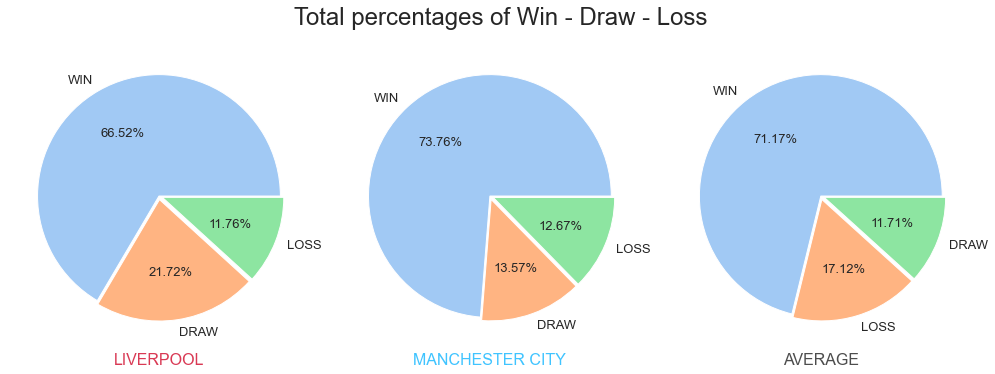

In [35]:
plt.figure(figsize=(14, 8))
plt.suptitle('Total percentages of Win - Draw - Loss', fontsize=24, y=0.8)

plt.subplot(1,3,1)
liv['outcome'].value_counts().plot(labels=['WIN', 'DRAW', 'LOSS'], kind='pie', fontsize=13, explode=(0, 0.03, 0.03), autopct='%1.2f%%')
plt.xlabel('LIVERPOOL', color=liv_color, fontsize=16)
plt.ylabel('')

plt.subplot(1,3,2)
city['outcome'].value_counts().plot(labels=['WIN', 'DRAW', 'LOSS'], kind='pie', fontsize=13, explode=(0, 0.03, 0.03), autopct='%1.2f%%')
plt.xlabel('MANCHESTER CITY', color=city_color, fontsize=16)
plt.ylabel('')

plt.subplot(1,3,3)
df['full_time_result'].value_counts().plot(labels=['WIN', 'LOSS', 'DRAW'], kind='pie', fontsize=13, explode=(0, 0.03, 0.03), autopct='%1.2f%%')
plt.xlabel('AVERAGE', color=avg_color, fontsize=16)
plt.ylabel('')

plt.tight_layout()
plt.show()


In [26]:
city

season                 date_time       home_team    away_team  \
8908   2016-17 2016-08-13 00:00:00+00:00        Man City   Sunderland   
8917   2016-17 2016-08-20 00:00:00+00:00           Stoke     Man City   
8932   2016-17 2016-08-28 00:00:00+00:00        Man City     West Ham   
8938   2016-17 2016-09-10 00:00:00+00:00      Man United     Man City   
8948   2016-17 2016-09-17 00:00:00+00:00        Man City  Bournemouth   
...        ...                       ...             ...          ...   
11058  2021-22 2022-02-26 17:30:00+00:00         Everton     Man City   
11069  2021-22 2022-03-06 16:30:00+00:00        Man City   Man United   
11084  2021-22 2022-03-14 20:00:00+00:00  Crystal Palace     Man City   
11094  2021-22 2022-04-02 15:00:00+00:00         Burnley     Man City   
11112  2021-22 2022-04-10 16:30:00+00:00        Man City    Liverpool   

       full_time_home_team_goals  full_time_away_team_goals full_time_result  \
8908                           2                          1                H   
8917                           1                          4                A   
8932                           3                          1                H   
8938                           1                          2                A   
8948                           4                          0                H   
...                          ...                        ...              ...   
11058                          0                          1                A   
11069                          4                          1                H   
11084                          0                          0                D   
11094                          0                          2                A   
11112                          2                          2                D   

       half_time_home_team_goals  half_time_away_team_goals half_time_result  \
8908                           1                          0                H   
8917                           0                          2                A   
8932                           2                          0                H   
8938                           1                          2                A   
8948                           2                          0                H   
...                          ...                        ...              ...   
11058                          0                          0                D   
11069                          2                          1                H   
11084                          0                          0                D   
11094                          0                          2                A   
11112                          2                          1                H   

       ... home_team_yellow_cards  away_team_yellow_cards  \
8908   ...                      1                       2   
8917   ...                      3                       4   
8932   ...                      1                       3   
8938   ...                      4                       2   
8948   ...                      1                       1   
...    ...                    ...                     ...   
11058  ...                      3                       2   
11069  ...                      0                       1   
11084  ...                      3                       1   
11094  ...                      1                       0   
11112  ...                      1                       4   

       home_team_red_cards  away_team_red_cards     winner  \
8908                     0                    0   Man City   
8917                     0                    0   Man City   
8932                     0                    0   Man City   
8938                     0                    0   Man City   
8948                     1                    0   Man City   
...                    ...                  ...        ...   
11058                    0                

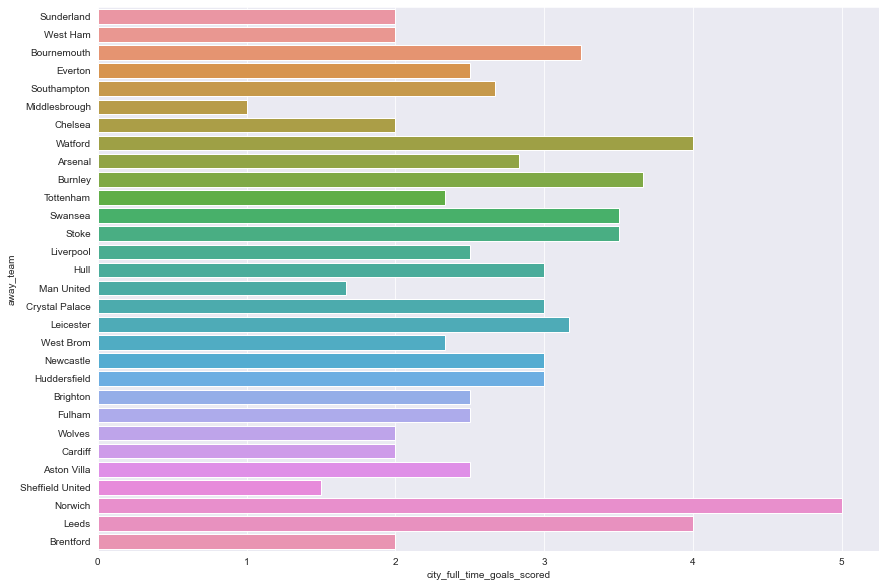

In [37]:
plt.figure(figsize=(14,10))
sns.barplot(
    data=city[city['home_team'] == 'Man City'],
    x='city_full_time_goals_scored',
    y='away_team',
    ci=None
)

plt.show()

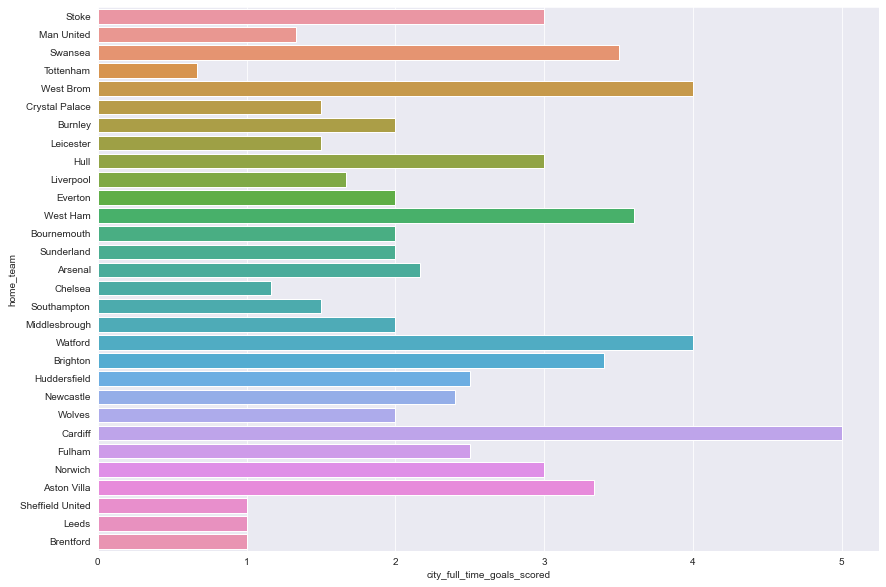

In [28]:
plt.figure(figsize=(14,10))
sns.barplot(
    data=city[city['away_team'] == 'Man City'],
    x='city_full_time_goals_scored',
    y='home_team',
    ci=None
)

plt.show()

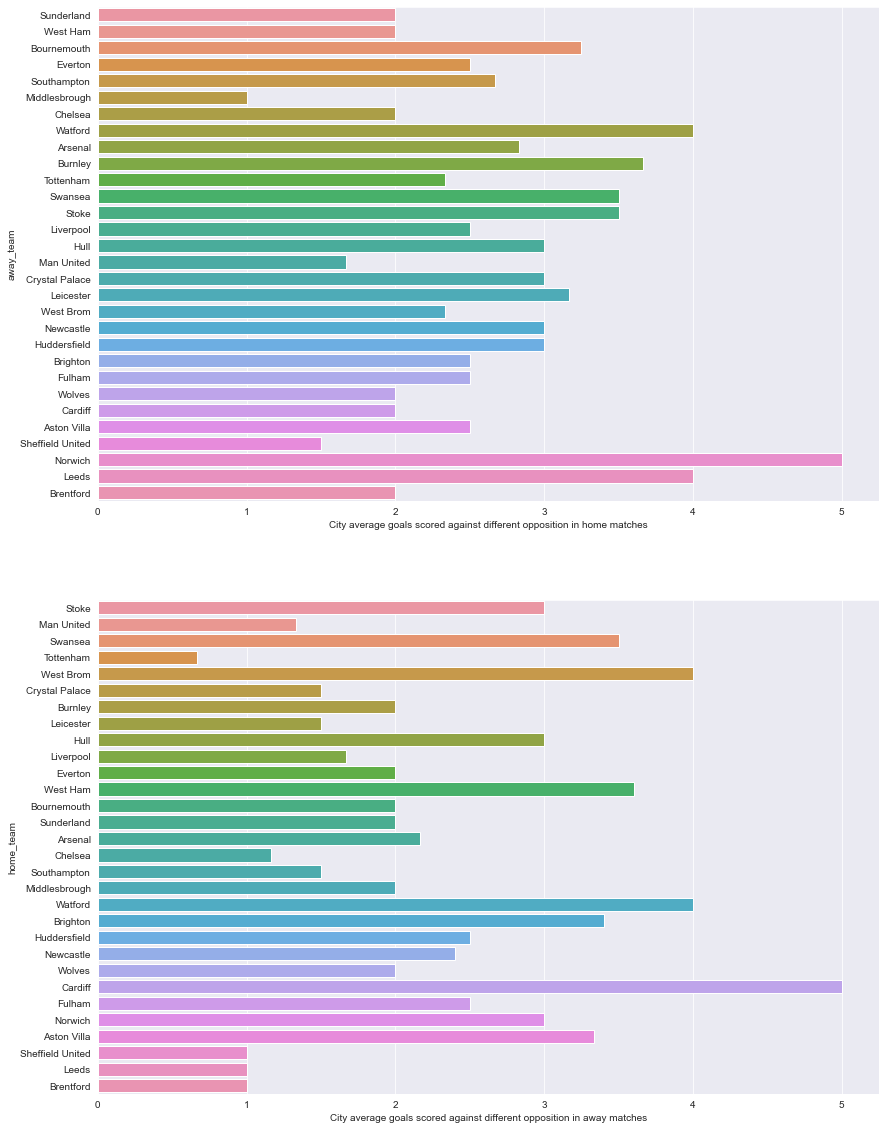

In [41]:
df1 = city[city['home_team'] == 'Man City']
df2 = city[city['away_team'] == 'Man City']

plt.figure(figsize=(14,20))

plt.subplot(2,1,1)
sns.barplot(
    data=df1,
    x='city_full_time_goals_scored',
    y='away_team',
    ci=None,
)
plt.xlabel('City average goals scored against different opposition in home matches')


plt.subplot(2,1,2)
sns.barplot(
    data=df2,
    x='city_full_time_goals_scored',
    y='home_team',
    ci=None
)
plt.xlabel('City average goals scored against different opposition in away matches')

plt.show()

In [45]:
liv

season                 date_time  home_team  away_team  \
8911   2016-17 2016-08-14 00:00:00+00:00    Arsenal  Liverpool   
8915   2016-17 2016-08-20 00:00:00+00:00    Burnley  Liverpool   
8930   2016-17 2016-08-27 00:00:00+00:00  Tottenham  Liverpool   
8937   2016-17 2016-09-10 00:00:00+00:00  Liverpool  Leicester   
8944   2016-17 2016-09-16 00:00:00+00:00    Chelsea  Liverpool   
...        ...                       ...        ...        ...   
11067  2021-22 2022-03-05 17:30:00+00:00  Liverpool   West Ham   
11075  2021-22 2022-03-12 12:30:00+00:00   Brighton  Liverpool   
11086  2021-22 2022-03-16 20:15:00+00:00    Arsenal  Liverpool   
11092  2021-22 2022-04-02 12:30:00+00:00  Liverpool    Watford   
11112  2021-22 2022-04-10 16:30:00+00:00   Man City  Liverpool   

       full_time_home_team_goals  full_time_away_team_goals full_time_result  \
8911                           3                          4                A   
8915                           2                          0                H   
8930                           1                          1                D   
8937                           4                          1                H   
8944                           1                          2                A   
...                          ...                        ...              ...   
11067                          1                          0                H   
11075                          0                          2                A   
11086                          0                          2                A   
11092                          2                          0                H   
11112                          2                          2                D   

       half_time_home_team_goals  half_time_away_team_goals half_time_result  \
8911                           1                          1                D   
8915                           2                          0                H   
8930                           0                          1                A   
8937                           2                          1                H   
8944                           0                          2                A   
...                          ...                        ...              ...   
11067                          1                          0                H   
11075                          0                          1                A   
11086                          0                          0                D   
11092                          1                          0                H   
11112                          2                          1                H   

       ... home_team_yellow_cards  away_team_yellow_cards  \
8911   ...                      3                       3   
8915   ...                      0                       1   
8930   ...                      3                       5   
8937   ...                      1                       2   
8944   ...                      1                       1   
...    ...                    ...                     ...   
11067  ...                      2                       1   
11075  ...                      3                       1   
11086  ...                      0                       1   
11092  ...                      1                       1   
11112  ...                      1                       4   

       home_team_red_cards  away_team_red_cards     winner  \
8911                     0                    0  Liverpool   
8915                     0                    0    Burnley   
8930                     0                    0  no_winner   
8937                     0                    0  Liverpool   
8944                     0                    0  Liverpool   
...                    ...                  ...        ...   
11067                    0                    0  Liverpool   
11075                    0                    0  Liverpool   
11

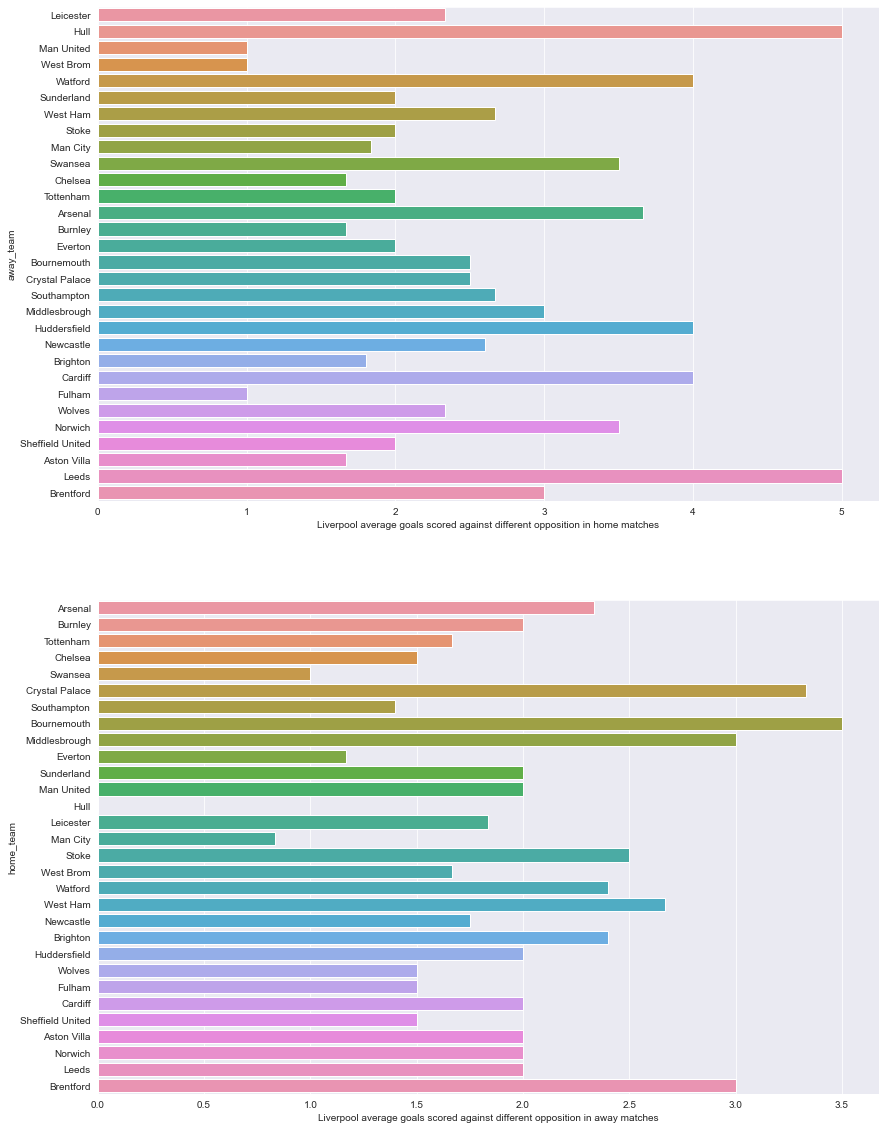

In [46]:
df3 = liv[liv['home_team'] == 'Liverpool']
df4 = liv[liv['away_team'] == 'Liverpool']

plt.figure(figsize=(14,20))

plt.subplot(2,1,1)
sns.barplot(
    data=df3,
    x='liv_full_time_goals_scored',
    y='away_team',
    ci=None,
)
plt.xlabel('Liverpool average goals scored against different opposition in home matches')


plt.subplot(2,1,2)
sns.barplot(
    data=df4,
    x='liv_full_time_goals_scored',
    y='home_team',
    ci=None
)
plt.xlabel('Liverpool average goals scored against different opposition in away matches')

plt.show()

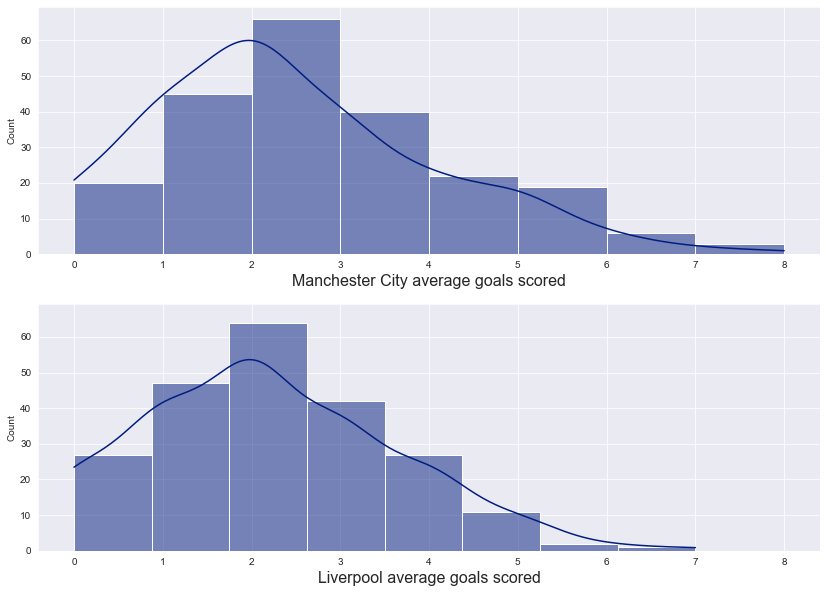

In [42]:
sns.set_style('darkgrid')
sns.set_palette("dark")

plt.figure(figsize=(14,10))

ax = plt.subplot(2,1,1)
sns.histplot(data=city, x='city_full_time_goals_scored', kde=True, bins=8)
plt.xlabel('Manchester City average goals scored', fontsize='16')

plt.subplot(2,1,2, sharex=ax, sharey=ax)
sns.histplot(data=liv, x='liv_full_time_goals_scored', kde=True, bins=8)
plt.xlabel('Liverpool average goals scored', fontsize='16')

plt.show()

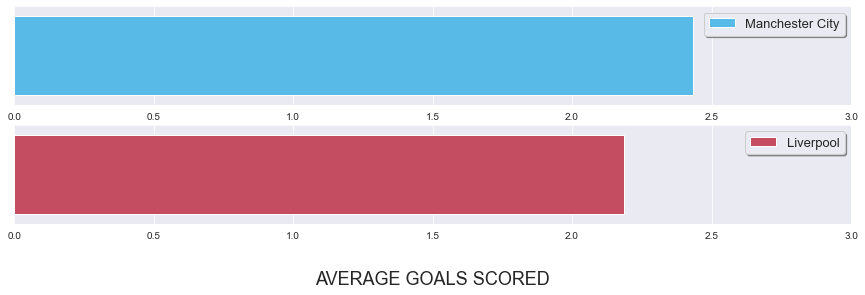

In [43]:
sns.set_style('darkgrid')
sns.set_palette("pastel")

plt.figure(figsize=(15,4))

ax = plt.subplot(2,1,1)
sns.barplot(data=city, x='city_full_time_goals_scored', color='#40c4ff', ci=None, label='Manchester City')
plt.xlabel("")
plt.legend(frameon=True, shadow=True, fontsize=13)

plt.subplot(2,1,2, sharex=ax, sharey=ax)
sns.barplot(data=liv, x='liv_full_time_goals_scored', color='#d93954', ci=None, label='Liverpool')
plt.xlabel("")
plt.xlim(0,3)
plt.legend(frameon=True, shadow=True, fontsize=13)
plt.xlabel('AVERAGE GOALS SCORED', fontsize=18, labelpad=30)

plt.show()

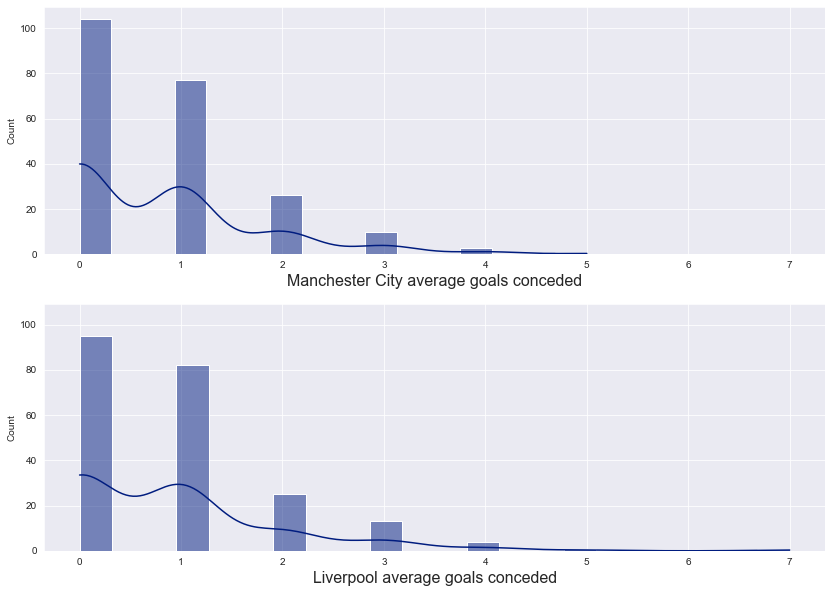

In [32]:
sns.set_style('darkgrid')
sns.set_palette("dark")

plt.figure(figsize=(14,10))

ax = plt.subplot(2,1,1)
sns.histplot(data=city, x='city_full_time_goals_conc', kde=True)
plt.xlabel('Manchester City average goals conceded', fontsize='16')

plt.subplot(2,1,2, sharex=ax, sharey=ax)
sns.histplot(data=liv, x='liv_full_time_goals_conc', kde=True)
plt.xlabel('Liverpool average goals conceded', fontsize='16')

plt.show()

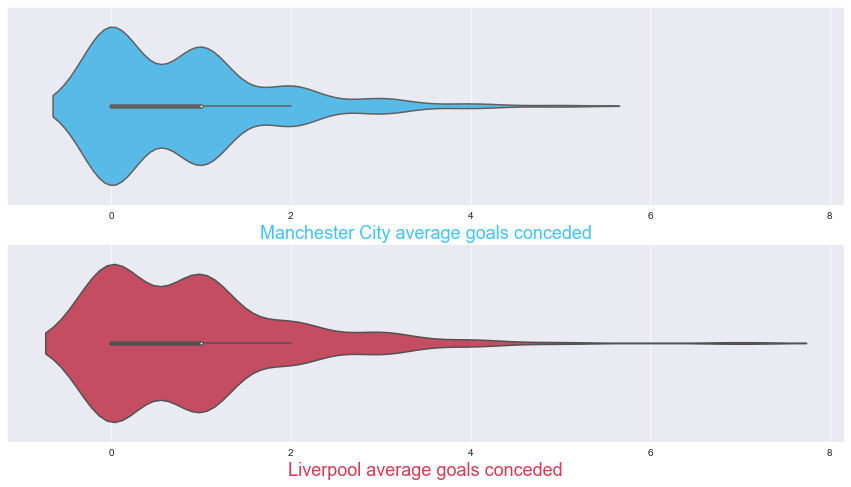

In [33]:
sns.set_style('darkgrid')
sns.set_palette("pastel")

plt.figure(figsize=(15,8))

ax = plt.subplot(2,1,1)
sns.violinplot(data=city, x='city_full_time_goals_conc', kde=True, color='#40c4ff')
plt.xlabel('Manchester City average goals conceded', fontsize='18', color='#40c4ff')

plt.subplot(2,1,2, sharex=ax, sharey=ax)
sns.violinplot(data=liv, x='liv_full_time_goals_conc', kde=True, color='#d93954')
plt.xlabel('Liverpool average goals conceded', fontsize='18', color='#d93954')

plt.show()

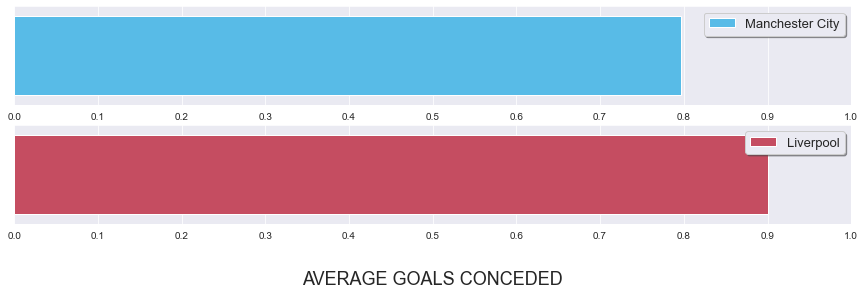

In [34]:
sns.set_style('darkgrid')
sns.set_palette("pastel")

plt.figure(figsize=(15,4))

ax = plt.subplot(2,1,1)
sns.barplot(data=city, x='city_full_time_goals_conc', color='#40c4ff', ci=None, label='Manchester City')
plt.xlabel("")
plt.legend(frameon=True, shadow=True, fontsize=13)

plt.subplot(2,1,2, sharex=ax, sharey=ax)
sns.barplot(data=liv, x='liv_full_time_goals_conc', color='#d93954', ci=None, label='Liverpool')
plt.xlabel("")
plt.xlim(0, 1)
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.legend(frameon=True, shadow=True, fontsize=13)
plt.xlabel('AVERAGE GOALS CONCEDED', fontsize=18, labelpad=30)

plt.show()